In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
#from apyori import apriori
import os
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv(r"/content/large_market_basket_dataset.csv")
data.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction_ID,Item 1,Item 2,Item 3,Item 4,Item 5,Item6
0,1,Milk,Bread,Butter,Coffee,NaN,NaN
1,2,Yogurt,Cheese,Milk,NaN,NaN,NaN
2,3,Tea,Cereal,Yogurt,NaN,NaN,NaN
3,4,Eggs,Juice,Cheese,Coffee,Bread,Tea
4,5,Butter,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction_ID  800 non-null    int64 
 1   Item 1          800 non-null    object
 2   Item 2          656 non-null    object
 3   Item  3         499 non-null    object
 4   Item 4          365 non-null    object
 5   Item 5          235 non-null    object
 6   Item6           123 non-null    object
dtypes: int64(1), object(6)
memory usage: 43.9+ KB


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-0efec23f55ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=data['Item 1'],


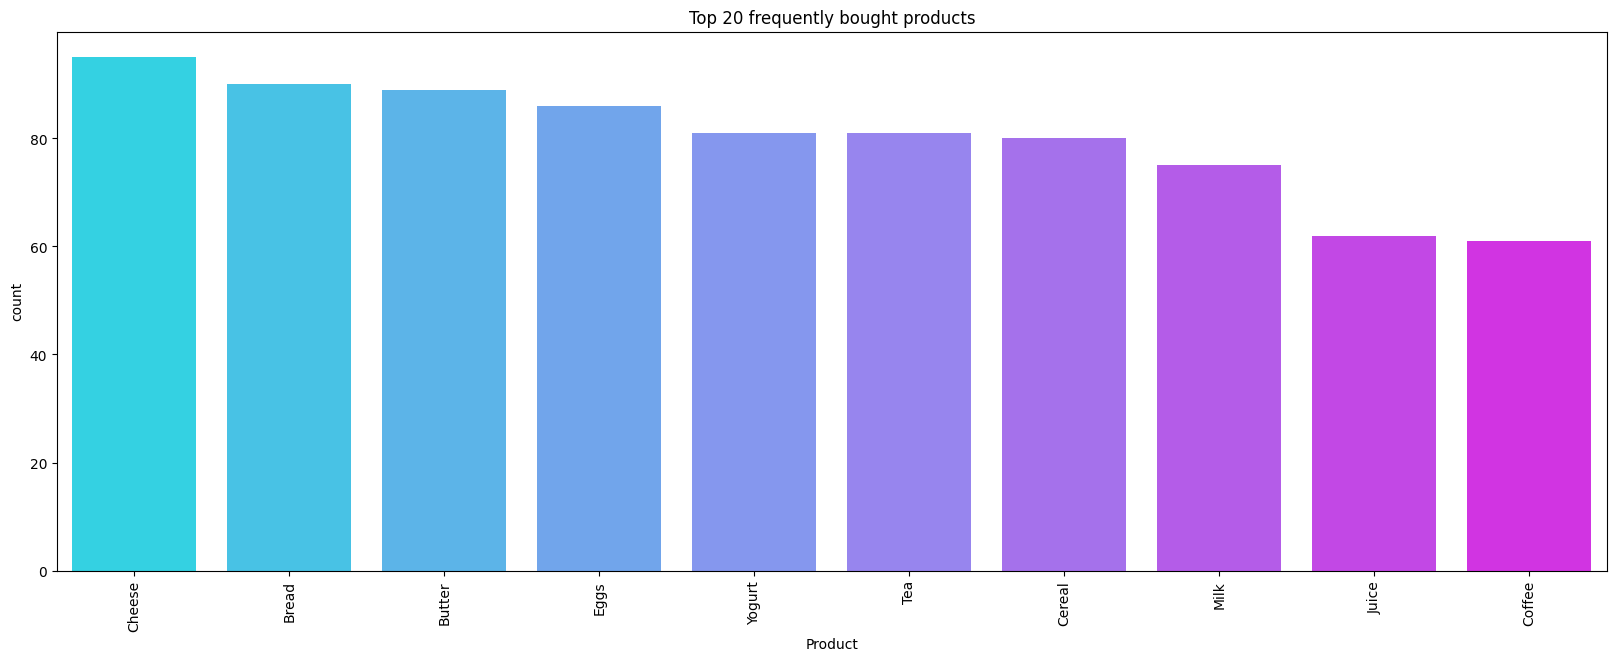

In [ ]:
#Top 20 frequently buying items by customer
plt.rcParams['figure.figsize']=20,7
sns.countplot(data=data, x=data['Item 1'],
             order = data['Item 1'].value_counts().head(20).index,
             palette="cool")
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
records

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Milk'],
 ['Yogurt', ' Cheese'],
 ['Tea', ' Cereal', ' Yogurt'],
 ['Eggs', ' Juice', ' Cheese', ' Coffee'],
 ['Butter', 'nan', 'nan', 'nan', 'nan'],
 ['Cereal', ' Cheese', ' Tea', ' Eggs', ' Bread', 'nan'],
 ['Eggs', ' Milk', ' Cheese', ' Yogurt', 'nan', 'nan'],
 ['Butter', ' Cheese', ' Eggs', ' Juice', 'nan', 'nan'],
 ['Milk', ' Butter', ' Tea', ' Cereal', ' Yogurt', ' Juice'],
 ['Yogurt', ' Tea', ' Butter', ' Coffee', 'nan', 'nan'],
 ['Yogurt', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['Cereal', ' Bread', ' Eggs', ' Cheese', ' Butter', 'nan'],
 ['Cheese', ' Juice', ' Coffee', 'nan', 'nan', 'nan'],
 ['Butter', ' Coffee', ' Bread', ' Tea', ' Cheese', ' Milk'],
 ['Cereal', ' Coffee', ' Cheese', ' Milk', ' Juice', ' Bread'],
 ['Cheese', ' Juice', 'nan', 'nan', 'nan', 'nan'],
 ['Milk', ' Cereal', ' Yogurt', ' Cheese', 'nan', 'nan'],
 ['Milk', ' Coffee', ' Eggs', 'nan', 'nan', 'nan'],
 ['Tea', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['Yogurt', ' Tea', ' Cereal', ' Coffee', ' Butter', ' Milk'],


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
onehot = te.fit_transform(records)
onehot = pd.DataFrame(onehot, columns = te.columns_)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
onehot.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Bread,Butter,Cereal,Cheese,Coffee,Eggs,Juice,Milk,Tea,Yogurt,...,Butter,Cereal,Cheese,Coffee,Eggs,Juice,Milk,Tea,Yogurt,nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [ ]:
#Shape of encoded onehot dataset
print(f'No.of Transection data: {onehot.shape[0]} rows and {onehot.shape[1]} unique Product(Columns)')

No.of Transection data: 800 rows and 21 unique Product(Columns)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

frequent_itemsets = apriori(onehot, min_support=0.001,use_colnames=True, max_len=3,verbose=1)

frequent_itemsets

Processing 3330 combinations | Sampling itemset size 3


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.22625,( Bread)
1,0.22875,( Butter)
2,0.20250,( Cereal)
3,0.23625,( Cheese)
4,0.27125,( Coffee)
...,...,...
786,0.02000,"(nan, Yogurt, Coffee)"
787,0.01500,"(nan, Eggs, Yogurt)"
788,0.01375,"( Yogurt, nan, Juice)"
789,0.02000,"(nan, Milk, Yogurt)"


In [ ]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules = rules.sort_values('lift', ascending=False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1886,"( Coffee, Eggs)",(Tea),0.07875,0.10125,0.0225,0.285714,2.821869,1.0,0.014527,1.258250,0.700814,0.142857,0.205245,0.253968
1891,(Tea),"( Coffee, Eggs)",0.10125,0.07875,0.0225,0.222222,2.821869,1.0,0.014527,1.184464,0.718359,0.142857,0.155736,0.253968
1890,( Eggs),"( Coffee, Tea)",0.23000,0.03625,0.0225,0.097826,2.698651,1.0,0.014162,1.068253,0.817460,0.092308,0.063892,0.359258
1887,"( Coffee, Tea)",( Eggs),0.03625,0.23000,0.0225,0.620690,2.698651,1.0,0.014162,2.030000,0.653120,0.092308,0.507389,0.359258
2359,( Tea),"(Cereal, Juice)",0.21875,0.03000,0.0175,0.080000,2.666667,1.0,0.010938,1.054348,0.800000,0.075676,0.051546,0.331667


In [ ]:
Output = round(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']],3)  # rounding off number by 2 digit after decimal

Output.head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
1886,"( Coffee, Eggs)",(Tea),0.022,0.286,2.822
1891,(Tea),"( Coffee, Eggs)",0.022,0.222,2.822
1890,( Eggs),"( Coffee, Tea)",0.022,0.098,2.699
1887,"( Coffee, Tea)",( Eggs),0.022,0.621,2.699
2359,( Tea),"(Cereal, Juice)",0.018,0.080,2.667
2358,"(Cereal, Juice)",( Tea),0.018,0.583,2.667
608,( Milk),"( Bread, Coffee)",0.011,0.045,2.584
605,"( Bread, Coffee)",( Milk),0.011,0.643,2.584
612,"(Tea, Milk)",( Bread),0.014,0.579,2.559
613,( Bread),"(Tea, Milk)",0.014,0.061,2.559


In [ ]:
targeted_rules = Output[Output['consequents'] == {'Eggs'}].copy()
targeted_rules

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
320,"( Bread, Cereal)",(Eggs),0.010,0.222,2.067
911,"( Coffee, Butter)",(Eggs),0.016,0.206,1.920
1584,"( Coffee, Cheese)",(Eggs),0.016,0.197,1.832
1462,"( Tea, Cereal)",(Eggs),0.010,0.190,1.772
1928,"( Coffee, Juice)",(Eggs),0.018,0.184,1.714
1286,"( Coffee, Cereal)",(Eggs),0.011,0.164,1.522
2410,"( Juice, Yogurt)",(Eggs),0.011,0.158,1.469
2080,"( Coffee, nan)",(Eggs),0.028,0.153,1.421
1025,"( Juice, Butter)",(Eggs),0.012,0.149,1.388
1379,"( Cereal, Juice)",(Eggs),0.009,0.149,1.385


In [ ]:
targeted_rules = Output[Output['consequents'] == {'Juice'}].copy()
targeted_rules

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
1333,"( Cereal, Eggs)",(Juice),0.009,0.189,2.441
1747,"( Cheese, Milk)",(Juice),0.011,0.161,2.074
1063,"( Butter, Milk)",(Juice),0.010,0.143,1.843
326,"( Bread, Cereal)",(Juice),0.006,0.139,1.792
2254,"( Eggs, Yogurt)",(Juice),0.010,0.136,1.750
2179,"( Eggs, Milk)",(Juice),0.008,0.133,1.720
2473,"( Tea, Milk)",(Juice),0.009,0.125,1.613
2218,"( Tea, Eggs)",(Juice),0.006,0.125,1.613
1644,"( Cheese, Eggs)",(Juice),0.009,0.123,1.585
1232,"( Cheese, Cereal)",(Juice),0.008,0.122,1.580


In [ ]:
filtered_rules = targeted_rules[(targeted_rules['confidence'] > 0.1) &
                                (targeted_rules['lift'] > 1.00)]
filtered_rules

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
1333,"( Cereal, Eggs)",(Juice),0.009,0.189,2.441
1747,"( Cheese, Milk)",(Juice),0.011,0.161,2.074
1063,"( Butter, Milk)",(Juice),0.010,0.143,1.843
326,"( Bread, Cereal)",(Juice),0.006,0.139,1.792
2254,"( Eggs, Yogurt)",(Juice),0.010,0.136,1.750
2179,"( Eggs, Milk)",(Juice),0.008,0.133,1.720
2473,"( Tea, Milk)",(Juice),0.009,0.125,1.613
2218,"( Tea, Eggs)",(Juice),0.006,0.125,1.613
1644,"( Cheese, Eggs)",(Juice),0.009,0.123,1.585
1232,"( Cheese, Cereal)",(Juice),0.008,0.122,1.580


Interpreartion
1. Cereal & Eggs (18.9%) and Cheese & Milk (16.1%) have strong confidence levels, suggesting a high likelihood that customers buying these pairs will also purchase Juice.
2. The highest lift (2.441) for Cereal & Eggs → Juice suggests a strong correlation, meaning this combination is more likely than random chance.
3.  Multiple combinations containing Eggs, Milk, and Cheese show up frequently, reinforcing their strong relationship with Juice purchases.
4. Placing Juice near items like Cereal, Eggs, and Dairy products (Cheese, Butter, Milk) could enhance cross-selling opportunities.